<h1>Proyecto 1</h1>

In [10]:
import pandas as pd
import nltk
import contractions
import inflect
import re, string
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
import pickle as pkl
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from datetime import datetime

In [11]:
ruta = "./data/SuicidiosProyecto.csv"
df = pd.read_csv(ruta, encoding="utf-8", index_col=0)
df.columns

Index(['text', 'class'], dtype='object')

In [12]:
df.sample(5)

,text,class
Unnamed: 0,,
208143,california is more aesthetic than new york the...,non-suicide
126160,Desperate and looking for helpI don’t normally...,suicide
133578,Torn apartMy gf (we were almost 3 years togeth...,suicide
24128,Just another post.I don't think I'm suicidal. ...,suicide
146200,Not sure where else to turn. I'm 26 years old....,suicide


In [13]:
df.dtypes

text     object
class    object
dtype: object

In [14]:
df['class'].value_counts(dropna=False, normalize=True)

non-suicide    0.562928
suicide        0.437072
Name: class, dtype: float64

In [15]:
df['text'] = df['text'].str.encode('ascii', 'ignore').str.decode('ascii')

In [16]:
df['no_constractions'] = df['text'].apply(lambda x: [contractions.fix(word) for word in x.split()])

In [17]:
df['text'] = [' '.join(map(str, l)) for l in df['no_constractions']]

In [22]:
df['tokenized'] = df['text'].apply(nltk.word_tokenize)

In [23]:
df['tokenized'] = df['tokenized'].apply(lambda x: [word.lower() for word in x])

In [24]:
punc = string.punctuation
df['tokenized'] = df['tokenized'].apply(lambda x: [word for word in x if word not in punc])

In [25]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['tokenized'] = df['tokenized'].apply(lambda x: [word for word in x if word not in stop_words])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elpin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
df['tokenized_str'] = [' '.join(map(str,l)) for l in df['tokenized']]
df.head()

,text,class,no_constractions,tokenized,tokenized_str
Unnamed: 0,,,,,
173271,i want to destroy myselffor once everything wa...,suicide,"[i, want, to, destroy, myselffor, once, everyt...","[want, destroy, myselffor, everything, startin...",want destroy myselffor everything starting fee...
336321,I kind of got behind schedule with learning fo...,non-suicide,"[I, kind of, got, behind, schedule, with, lear...","[kind, got, behind, schedule, learning, next, ...",kind got behind schedule learning next week te...
256637,I am just not sure anymoreFirst and foremost: ...,suicide,"[I am, just, not, sure, anymoreFirst, and, for...","[sure, anymorefirst, foremost, brazil, judge, ...",sure anymorefirst foremost brazil judge second...
303772,please give me a reason to liveThats too much ...,suicide,"[please, give, me, a, reason, to, liveThats, t...","[please, give, reason, livethats, much, reason...",please give reason livethats much reason live ...
293747,27f struggling to find meaning moving forwardI...,suicide,"[27f, struggling, to, find, meaning, moving, f...","[27f, struggling, find, meaning, moving, forwa...",27f struggling find meaning moving forwardi ad...


In [27]:
df.sample(5)

,text,class,no_constractions,tokenized,tokenized_str
Unnamed: 0,,,,,
210088,"Please, someone talk to me.I am horribly depre...",suicide,"[Please,, someone, talk, to, me.I, am, horribl...","[please, someone, talk, me.i, horribly, depres...",please someone talk me.i horribly depressed su...
37308,i want to die and at the same time i do not i ...,non-suicide,"[i, want, to, die, and, at, the, same, time, i...","[want, die, time, want, die, family, want, liv...",want die time want die family want live friend...
118380,I am a burden to everyoneI do not think I dese...,suicide,"[I am, a, burden, to, everyoneI, do not, think...","[burden, everyonei, think, deserve, alive, wil...",burden everyonei think deserve alive willpower...
185746,if being cute was illegal then I am under arre...,non-suicide,"[if, being, cute, was, illegal, then, I am, un...","[cute, illegal, arrest, selling, amphetamine, ...",cute illegal arrest selling amphetamine 4th gr...
44576,Life is pointlessThe meaning of life is to jus...,suicide,"[Life, is, pointlessThe, meaning, of, life, is...","[life, pointlessthe, meaning, life, reproduce,...",life pointlessthe meaning life reproduce die w...


In [28]:
x_train, x_test, y_train, y_test = train_test_split(df['tokenized_str'], df['class'], test_size=0.3, random_state=28)

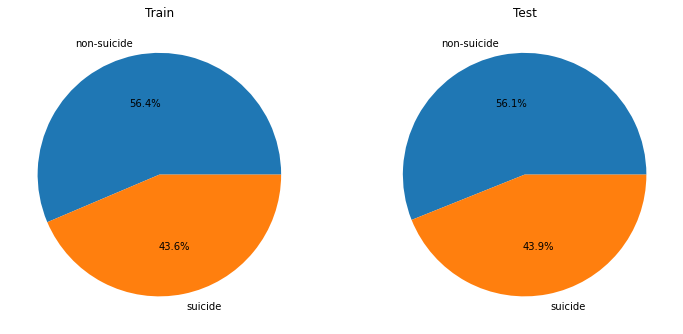

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(12, 12))
ax[0].pie(y_train.value_counts(), labels=y_train.value_counts().index, autopct='%1.1f%%')
ax[0].set_title('Train')
ax[1].pie(y_test.value_counts(), labels=y_test.value_counts().index, autopct='%1.1f%%')
ax[1].set_title('Test')
plt.show()

In [43]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
stopwords.union({'4661', 'meeeeeeeeeeee', 'ja', '01457654035', 'reaally', '3624', '3904512441', 'mesooo', 'ان فرع', ''})

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elpin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'',
 '01457654035',
 '3624',
 '3904512441',
 '4661',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'ja',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'meeeeeeeeeeee',
 'mesooo',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'on

In [44]:
def tokenize(text):
    tokenizer = nltk.TweetTokenizer()
    return tokenizer.tokenize(text)

In [45]:
bow = CountVectorizer(tokenizer=tokenize, stop_words=stopwords)
bow.fit(x_train)
x_train_bow = bow.fit_transform(x_train)
x_test_bow = bow.transform(x_test)
len(bow.get_feature_names())

c:\Users\elpin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\elpin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


138374

In [46]:
tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words=stopwords)
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)
len(tfidf.get_feature_names())

138374

In [47]:
pkl.dump(x_train_bow, open('data/x_train_bow.pkl', 'wb'))
pkl.dump(x_test_bow, open('data/x_test_bow.pkl', 'wb'))
pkl.dump(x_train_tfidf, open('data/x_train_tfidf.pkl', 'wb'))
pkl.dump(x_test_tfidf, open('data/x_test_tfidf.pkl', 'wb'))

In [48]:
x_train_bow = pkl.load(open('data/x_train_bow.pkl', 'rb'))
x_test_bow = pkl.load(open('data/x_test_bow.pkl', 'rb'))

In [49]:
x_train_tfidf = pkl.load(open('data/x_train_tfidf.pkl', 'rb'))
x_test_tfidf = pkl.load(open('data/x_test_tfidf.pkl', 'rb'))

<h3>Red neuronal usando BoW</h3>

In [50]:
bow_model = MLPClassifier(verbose=True, early_stopping=True)

In [51]:
bow_model.fit(x_train_bow, y_train)

Iteration 1, loss = 0.23484188
Validation score: 0.931747
Iteration 2, loss = 0.13249830
Validation score: 0.935178
Iteration 3, loss = 0.09347592
Validation score: 0.932550
Iteration 4, loss = 0.06912030
Validation score: 0.933791
Iteration 5, loss = 0.05147521
Validation score: 0.932258
Iteration 6, loss = 0.03767040
Validation score: 0.932550
Iteration 7, loss = 0.02967210
Validation score: 0.930652
Iteration 8, loss = 0.02995733
Validation score: 0.929703
Iteration 9, loss = 0.02303927
Validation score: 0.929776
Iteration 10, loss = 0.01986214
Validation score: 0.931966
Iteration 11, loss = 0.01636582
Validation score: 0.929922
Iteration 12, loss = 0.01537821
Validation score: 0.923133
Iteration 13, loss = 0.02136345
Validation score: 0.929776
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(early_stopping=True, verbose=True)

In [52]:
bow_pred_train = bow_model.predict(x_train_bow)
bow_pred_test = bow_model.predict(bow.transform(x_test))

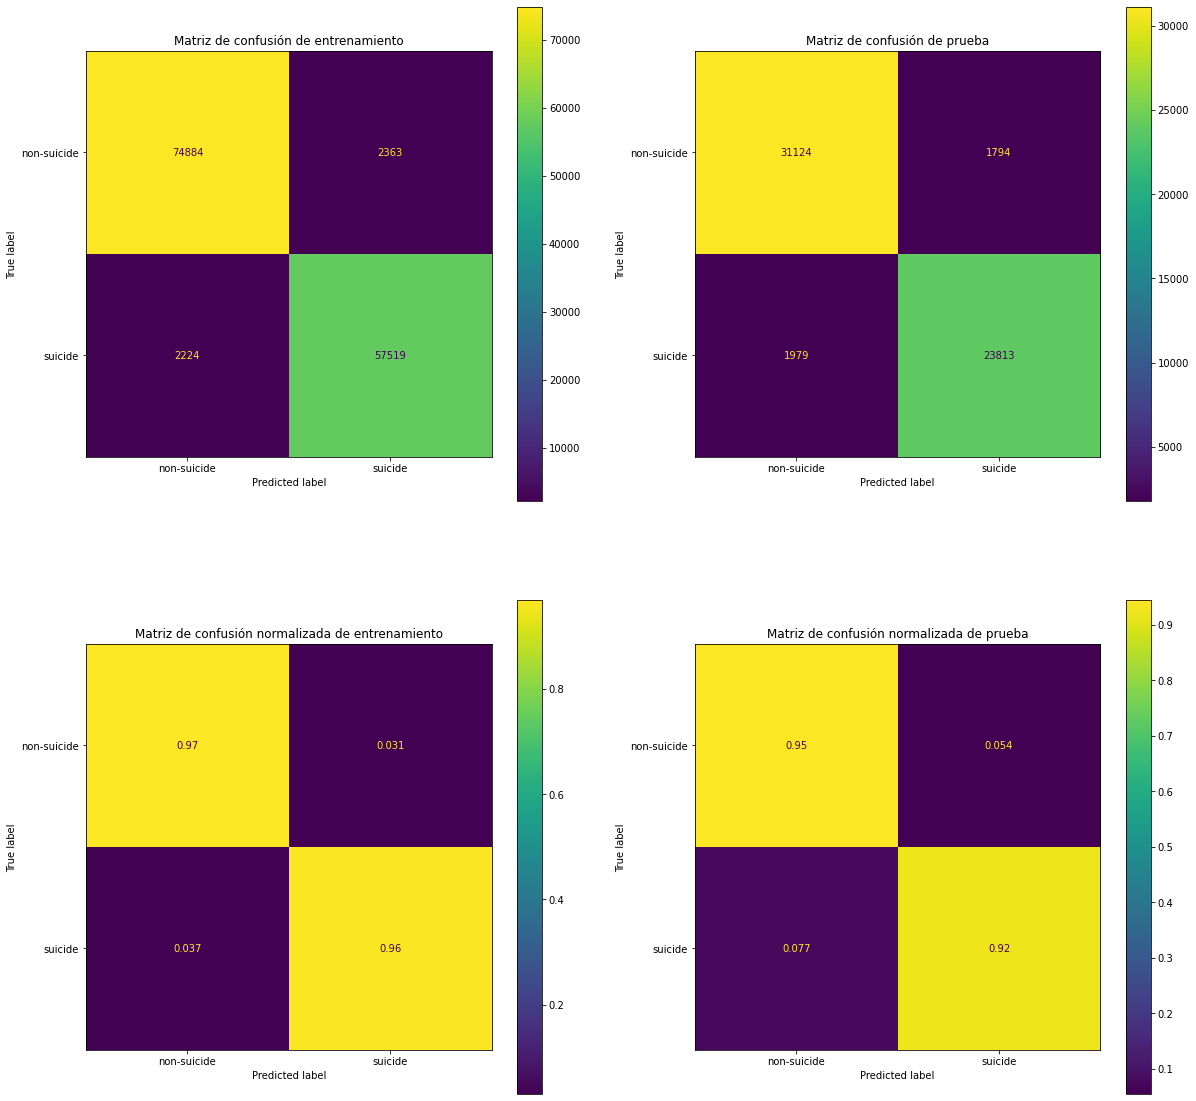

In [53]:
cm_train = confusion_matrix(y_train, bow_pred_train)
cm_test = confusion_matrix(y_test, bow_pred_test)
cm_train_norm = confusion_matrix(y_train, bow_pred_train, normalize='true')
cm_test_norm = confusion_matrix(y_test, bow_pred_test, normalize='true')

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
ax[0, 0].set_title('Matriz de confusión de entrenamiento')
ax[0, 1].set_title('Matriz de confusión de prueba')
ax[1, 0].set_title('Matriz de confusión normalizada de entrenamiento')
ax[1, 1].set_title('Matriz de confusión normalizada de prueba')
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=bow_model.classes_)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=bow_model.classes_)
disp_train_norm = ConfusionMatrixDisplay(confusion_matrix=cm_train_norm, display_labels=bow_model.classes_)
disp_test_norm = ConfusionMatrixDisplay(confusion_matrix=cm_test_norm, display_labels=bow_model.classes_)
disp_train.plot(ax=ax[0, 0])
disp_test.plot(ax=ax[0, 1])
disp_train_norm.plot(ax=ax[1, 0])
disp_test_norm.plot(ax=ax[1, 1])
plt.show()

In [54]:
pd.DataFrame([{'Train': accuracy_score(y_train, bow_pred_train), 'Test': accuracy_score(y_test, bow_pred_test)},
            {'Train': precision_score(y_train, bow_pred_train, average='weighted'), 'Test': precision_score(y_test, bow_pred_test, average='weighted')},
            {'Train': recall_score(y_train, bow_pred_train, average='weighted'), 'Test': recall_score(y_test, bow_pred_test, average='weighted')},
            {'Train': f1_score(y_train, bow_pred_train, average='weighted'), 'Test': f1_score(y_test, bow_pred_test, average='weighted')}],
            index=['Accuracy', 'Precision', 'Recall', 'F1'])

,Train,Test
Accuracy,0.966516,0.935735
Precision,0.966527,0.935703
Recall,0.966516,0.935735
F1,0.966520,0.935709


In [55]:
now = datetime.now()
date = now.date()
time = now.time().strftime("%H-%M-%S")
nombre="NN/BOW_"+str(date)+"_"+str(time)+".pkl"
pkl.dump(bow_model,open(nombre,"wb"))

<h3>Red neuronal usando TF-IDF</h3>

In [56]:
tfidf_model = MLPClassifier(verbose=True, early_stopping=True)

In [57]:
tfidf_model.fit(x_train_tfidf, y_train)

Iteration 1, loss = 0.23575236
Validation score: 0.937587
Iteration 2, loss = 0.13054059
Validation score: 0.938463
Iteration 3, loss = 0.09627159
Validation score: 0.935835
Iteration 4, loss = 0.07157955
Validation score: 0.934229
Iteration 5, loss = 0.05421980
Validation score: 0.932039
Iteration 6, loss = 0.04209032
Validation score: 0.929776
Iteration 7, loss = 0.03342811
Validation score: 0.927440
Iteration 8, loss = 0.02754499
Validation score: 0.925396
Iteration 9, loss = 0.02352220
Validation score: 0.925542
Iteration 10, loss = 0.02059314
Validation score: 0.922841
Iteration 11, loss = 0.01847304
Validation score: 0.923352
Iteration 12, loss = 0.01632703
Validation score: 0.922330
Iteration 13, loss = 0.01494566
Validation score: 0.922184
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(early_stopping=True, verbose=True)

In [58]:
tfidf_pred_train = tfidf_model.predict(x_train_tfidf)
tfidf_pred_test = tfidf_model.predict(tfidf.transform(x_test))

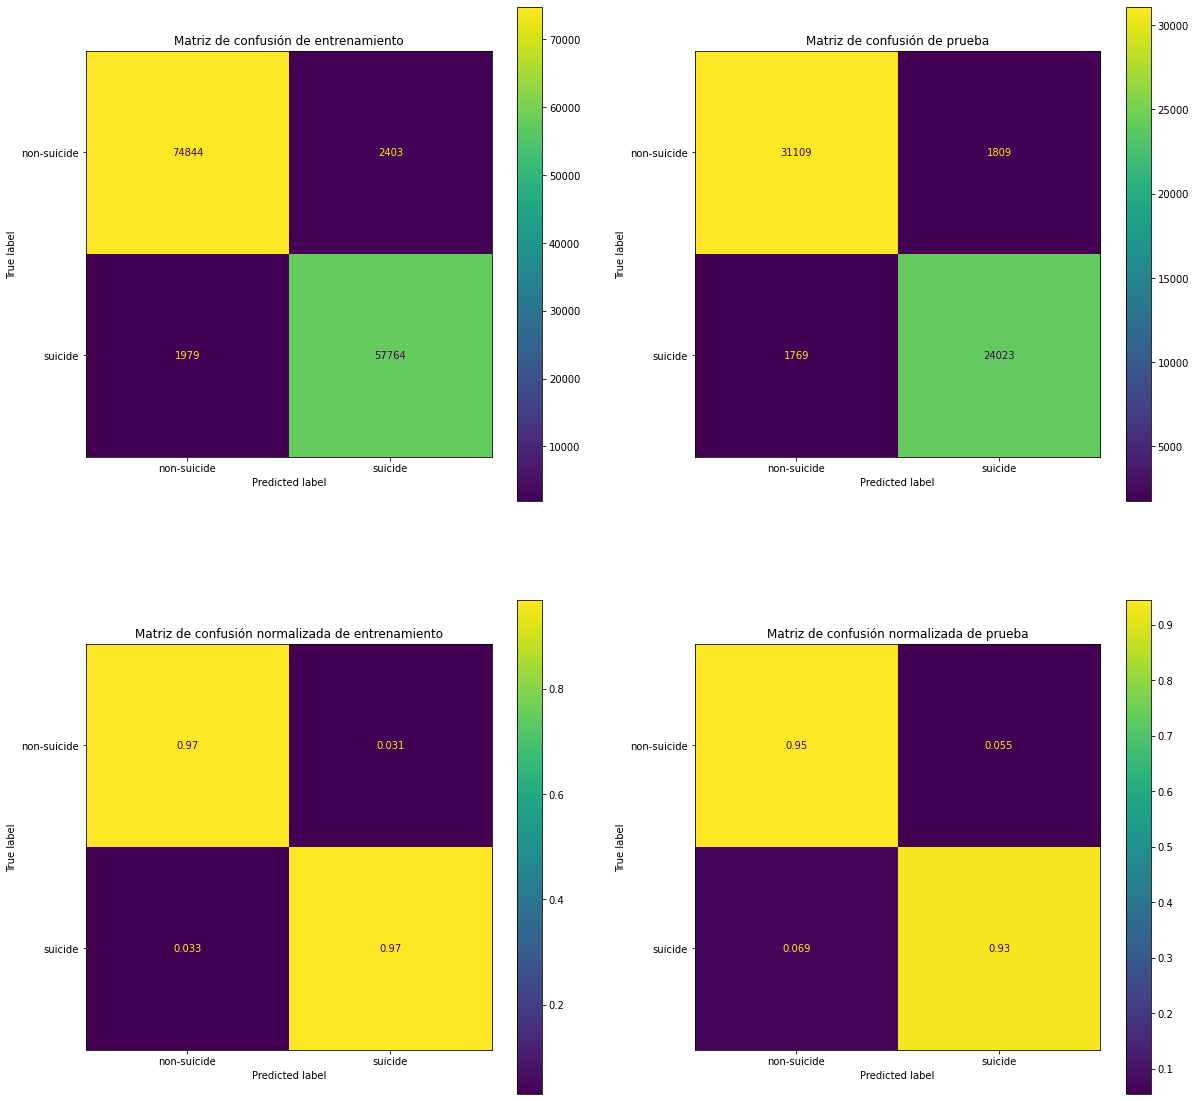

In [59]:
cm_train = confusion_matrix(y_train, tfidf_pred_train)
cm_test = confusion_matrix(y_test, tfidf_pred_test)
cm_train_norm = confusion_matrix(y_train, tfidf_pred_train, normalize='true')
cm_test_norm = confusion_matrix(y_test, tfidf_pred_test, normalize='true')

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
ax[0, 0].set_title('Matriz de confusión de entrenamiento')
ax[0, 1].set_title('Matriz de confusión de prueba')
ax[1, 0].set_title('Matriz de confusión normalizada de entrenamiento')
ax[1, 1].set_title('Matriz de confusión normalizada de prueba')
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=tfidf_model.classes_)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=tfidf_model.classes_)
disp_train_norm = ConfusionMatrixDisplay(confusion_matrix=cm_train_norm, display_labels=tfidf_model.classes_)
disp_test_norm = ConfusionMatrixDisplay(confusion_matrix=cm_test_norm, display_labels=tfidf_model.classes_)
disp_train.plot(ax=ax[0, 0])
disp_test.plot(ax=ax[0, 1])
disp_train_norm.plot(ax=ax[1, 0])
disp_test_norm.plot(ax=ax[1, 1])
plt.show()

In [60]:
pd.DataFrame([{'Train': accuracy_score(y_train, tfidf_pred_train), 'Test': accuracy_score(y_test, tfidf_pred_test)},
            {'Train': precision_score(y_train, tfidf_pred_train, average='weighted'), 'Test': precision_score(y_test, tfidf_pred_test, average='weighted')},
            {'Train': recall_score(y_train, tfidf_pred_train, average='weighted'), 'Test': recall_score(y_test, tfidf_pred_test, average='weighted')},
            {'Train': f1_score(y_train, tfidf_pred_train, average='weighted'), 'Test': f1_score(y_test, tfidf_pred_test, average='weighted')}],
            index=['Accuracy', 'Precision', 'Recall', 'F1'])

,Train,Test
Accuracy,0.968012,0.939056
Precision,0.968056,0.939067
Recall,0.968012,0.939056
F1,0.968025,0.939061


In [61]:
now = datetime.now()
date = now.date()
time = now.time().strftime("%H-%M-%S")
nombre="NN/tfidf_"+str(date)+"_"+str(time)+".pkl"
pkl.dump(tfidf_model,open(nombre,"wb"))